In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
#### build PCR model ####  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #### shuffling is defult ### 
import matplotlib.patches as mpatches ### will be used for legend labeling ### 

In [80]:
                        #####  Preprocessing   #####
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.20) 
###### scale and choose number of features for best accuracy ##### 
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
n ,num_features = np.shape(X_reduced)
# 10 folds for validation 
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#### the first mse value is for no pc in regression ##### 
mse_calibration = np.ones(num_features + 1 ) 
mse_validation = np.ones(num_features + 1 ) 

 mse_calibration =  [ 0.66948731  0.07406455  0.0741891   0.05298832  0.05360654]
  mse_validation =  [ 1.          0.0756549   0.07548489  0.0410912   0.04267272]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


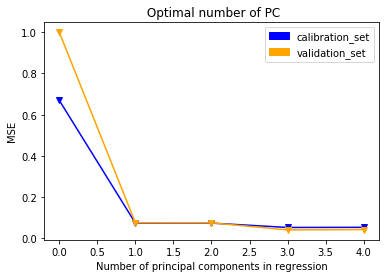

In [60]:

#### regression model ###  
regr = LinearRegression()

# Calculate MSE with only the intercept (no principal components in regression)
    ##### training ####
calibration_score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse_calibration[0] = calibration_score 


# Calculate MSE using CV for the ## principle components, adding one component at the time.
for i in np.arange(1, 5): 
        ##### training ####
    X_reduced_training = pca.transform(scale(X_train))[:,:i] 
    mse_calibration[i] =  -1*model_selection.cross_val_score(regr, X_reduced_training[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
      #### validating ##### 
    X_reduced_test = pca.transform(scale(X_test))[:,:i] 
    mse_validation[i] = -1*model_selection.cross_val_score(regr, X_reduced_test, y_test.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    


plt.plot(np.array(mse_calibration), '-v' , color = 'blue') 
plt.plot(np.array(mse_validation), '-v' , color = 'orange')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title(' Optimal number of PC')
plt.xlim(xmin=-0.2); 
red_patch = mpatches.Patch(color='orange', label='validation_set') 
blue_patch = mpatches.Patch(color='blue', label='calibration_set')
plt.legend(handles=[blue_patch , red_patch]) 
print(' mse_calibration = ' , mse_calibration) 
print('  mse_validation = ' , mse_validation)

In [63]:
print( 'best_pc for validation is  = ' , np.argmin(mse_validation))  
print( 'best_pc for calibration is  = ' , np.argmin(mse_calibration)) 
####### teststing and validating ###### 
best_pca = np.argmin(mse) + 1
X_reduced_test = pca.transform(scale(X_test))[:,:4]
# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced[:,:4], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

best_pc for validation is  =  3
best_pc for calibration is  =  3


0.036572674658797745

In [4]:
######### Test for hyperspectral Imaging ###### 
                        #####  Preprocessing   #####
import numpy as np   
import spectral 
from sklearn.model_selection import train_test_split #### shuffling is defult ### 

_3d_data_set = np.load('Datasets/Indian Pines/indianpinearray.npy') 
print(_3d_data_set[:,:,1])
ground_truth = np.load('Datasets/Indian Pines/IPgt.npy') 
data_set = np.reshape(_3d_data_set,(145*145,200)) 
ground_truth = np.reshape(ground_truth,(145*145))
X_train, X_test, y_train, y_test = train_test_split(data_set, ground_truth, test_size=0.35) 
###### scale and choose number of features for best accuracy ##### 


[[4142 4266 4266 ..., 3890 4130 3890]
 [4388 4264 4268 ..., 4512 4264 4268]
 [4146 4389 4273 ..., 4266 4262 4142]
 ..., 
 [3728 3604 3612 ..., 4115 4111 3991]
 [3731 3742 4114 ..., 3858 3858 3866]
 [3728 3728 3728 ..., 3864 4104 3860]]


In [5]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 
print(np.shape(data_set))

(13666, 200)
(7359, 200)
(13666,)
(7359,)
(21025, 200)


In [18]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
n ,num_features = np.shape(X_reduced)
# 10 folds for validation 
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#### the first mse value is for no pc in regression ##### 
# mse_calibration = [100] *(num_features + 1 ) 
# mse_validation = [100] * (num_features + 1 ) 
mse_calibration = [100] *(101 ) 
mse_validation = [100] * (101) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


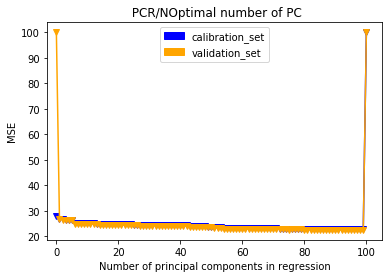

In [43]:
%%capture --no-display

#### regression model ###  
regr = LinearRegression()

# # Calculate MSE with only the intercept (no principal components in regression)
#     ##### training ####
calibration_score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse_calibration[0] = calibration_score 


# Calculate MSE using CV for the ## principle components, adding one component at the time.
for i in np.arange(1, 0): 
        ##### training ####
    X_reduced_training = pca.transform(scale(X_train))[:,:i] 
    mse_calibration[i] =  -1*model_selection.cross_val_score(regr, X_reduced_training[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
      #### validating ##### 
    X_reduced_test = pca.transform(scale(X_test))[:,:i] 
    mse_validation[i] = -1*model_selection.cross_val_score(regr, X_reduced_test, y_test.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    


plt.plot(np.array(mse_calibration), '-v' , color = 'blue') 
plt.plot(np.array(mse_validation), '-v' , color = 'orange')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title(' Optimal number of PC')
plt.xlim(xmin=-3.0); 
red_patch = mpatches.Patch(color='orange', label='validation_set') 
blue_patch = mpatches.Patch(color='blue', label='calibration_set')
plt.legend(handles=[blue_patch , red_patch]) 
print(' mse_calibration = ' , mse_calibration) 
print('  mse_validation = ' , mse_validation)

In [44]:
mse_validation[np.argmin(mse_validation )]

22.462022461615636

In [35]:
print( 'best_pc for validation is  = ' , np.argmin(mse_validation))  
print( 'best_pc for calibration is  = ' , np.argmin(mse_calibration)) 
####### teststing and validating ###### 
best_pca = np.argmin(mse_validation) + 1
X_reduced_test = pca.transform(scale(X_test))[:,:best_pca]
# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced[:,:best_pca], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

best_pc for validation is  =  94
best_pc for calibration is  =  99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


22.275314282265697

In [37]:
pred

array([ 3.2068716 ,  2.17987996, -0.26792407, ...,  6.97716669,
        5.66694399,  0.77087795])